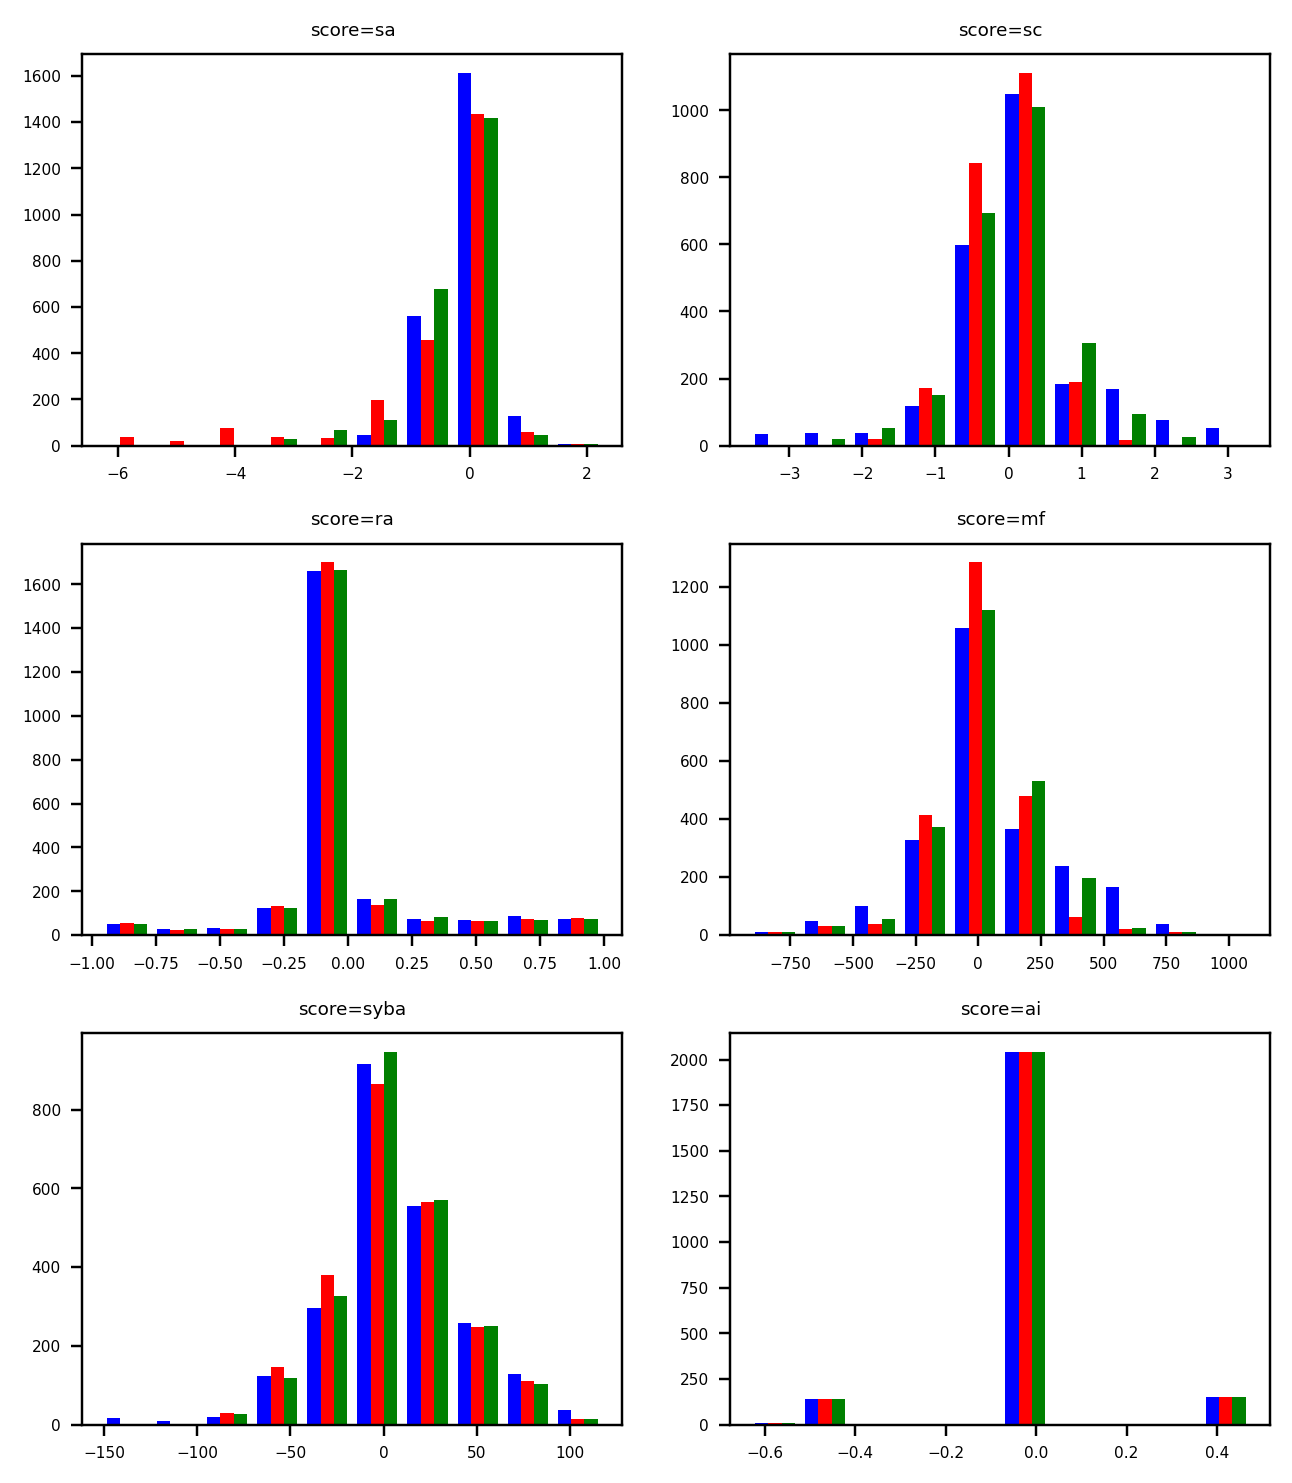

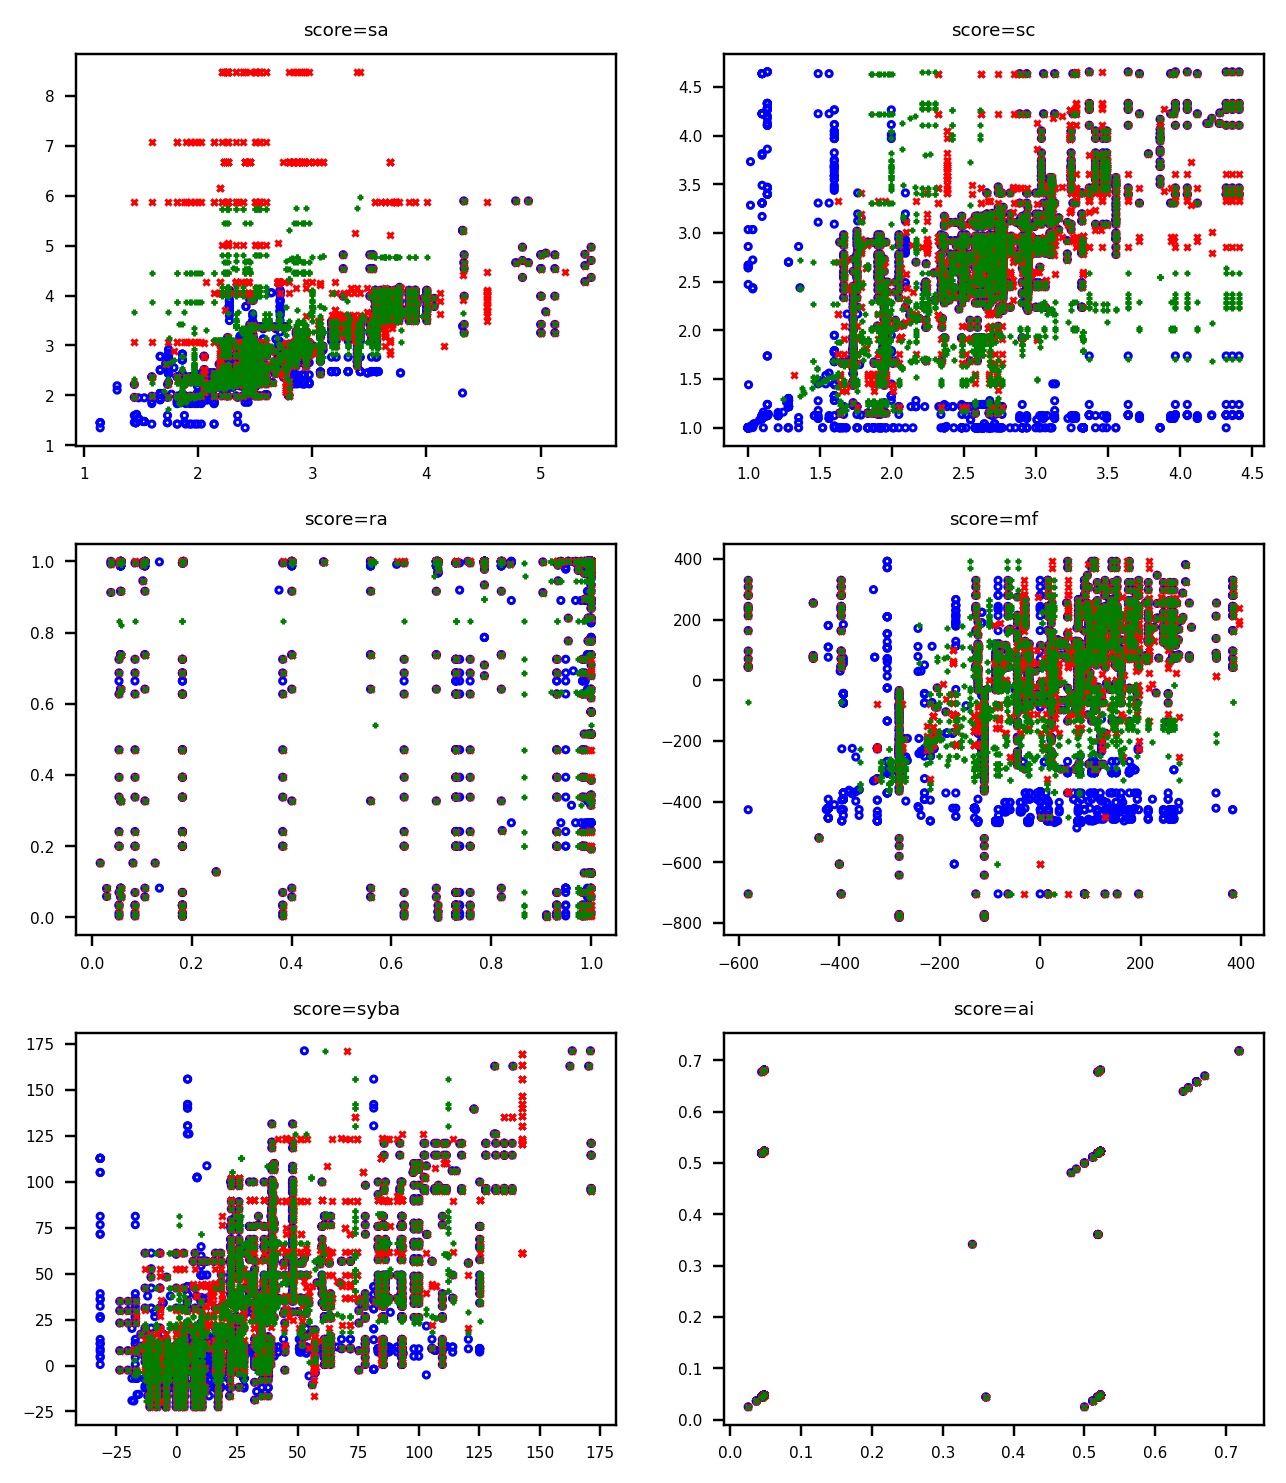

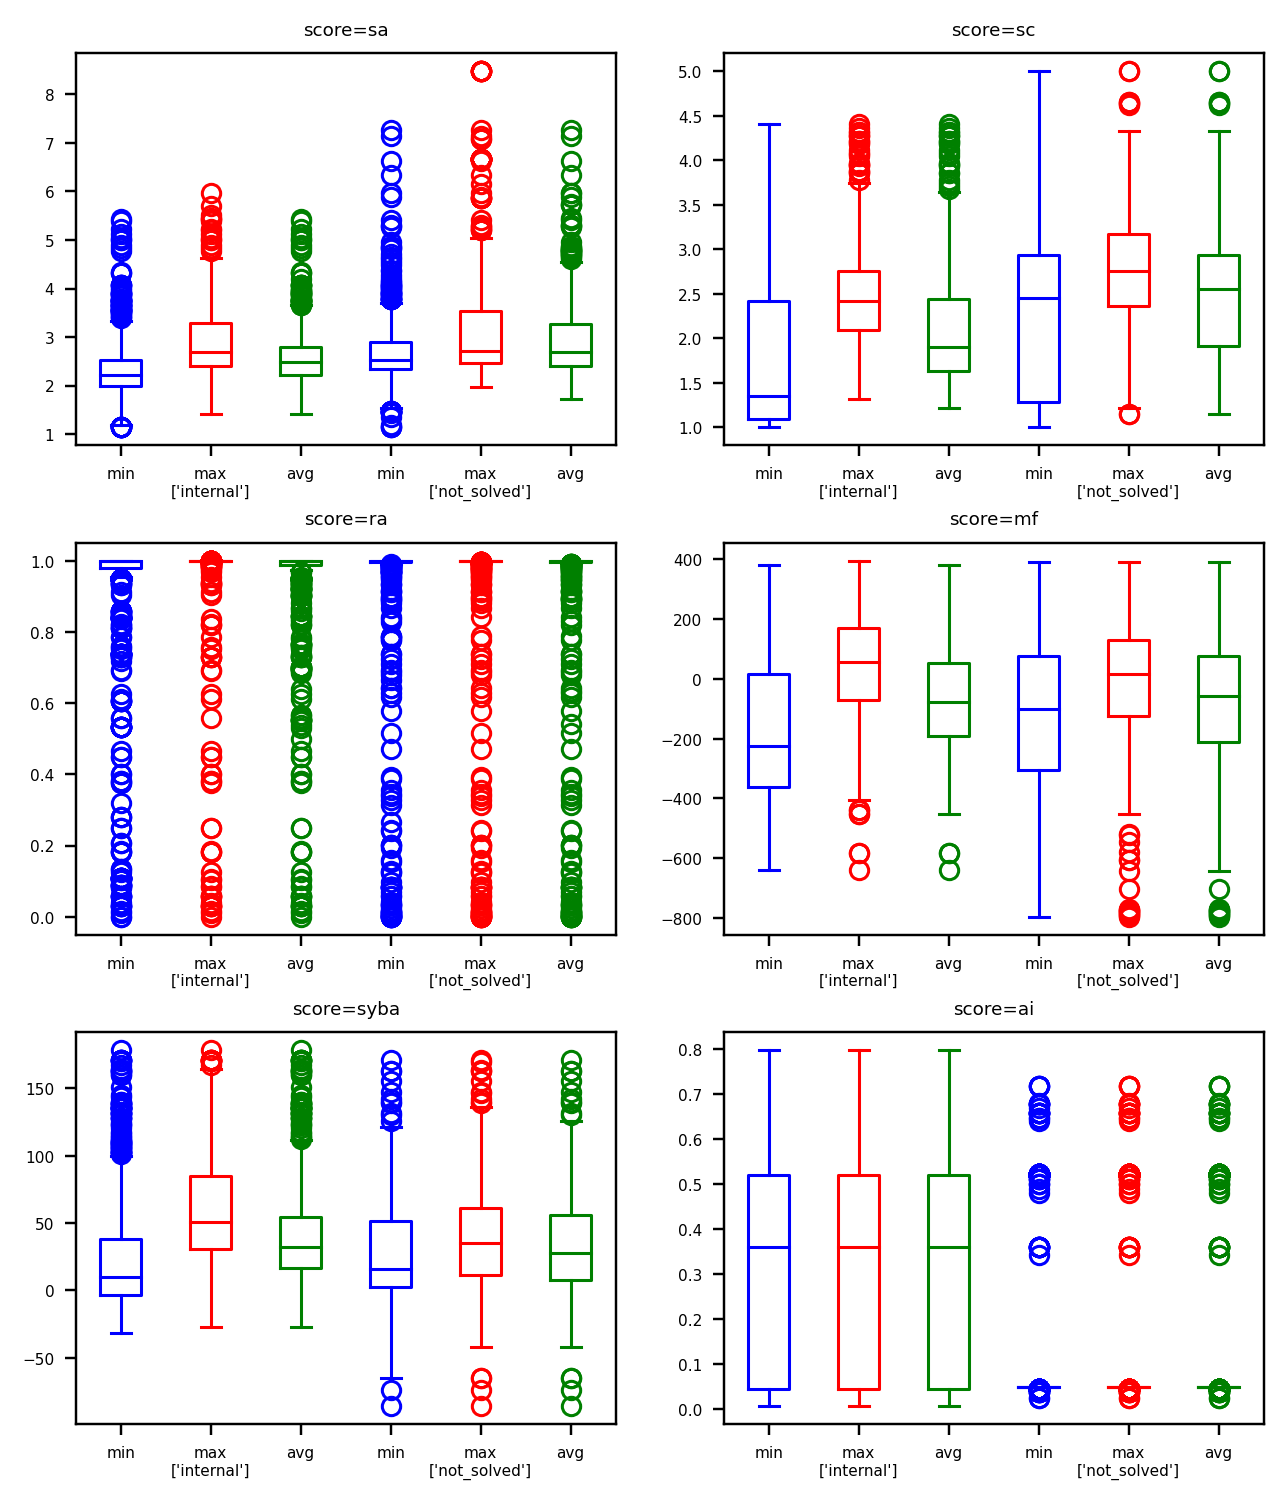

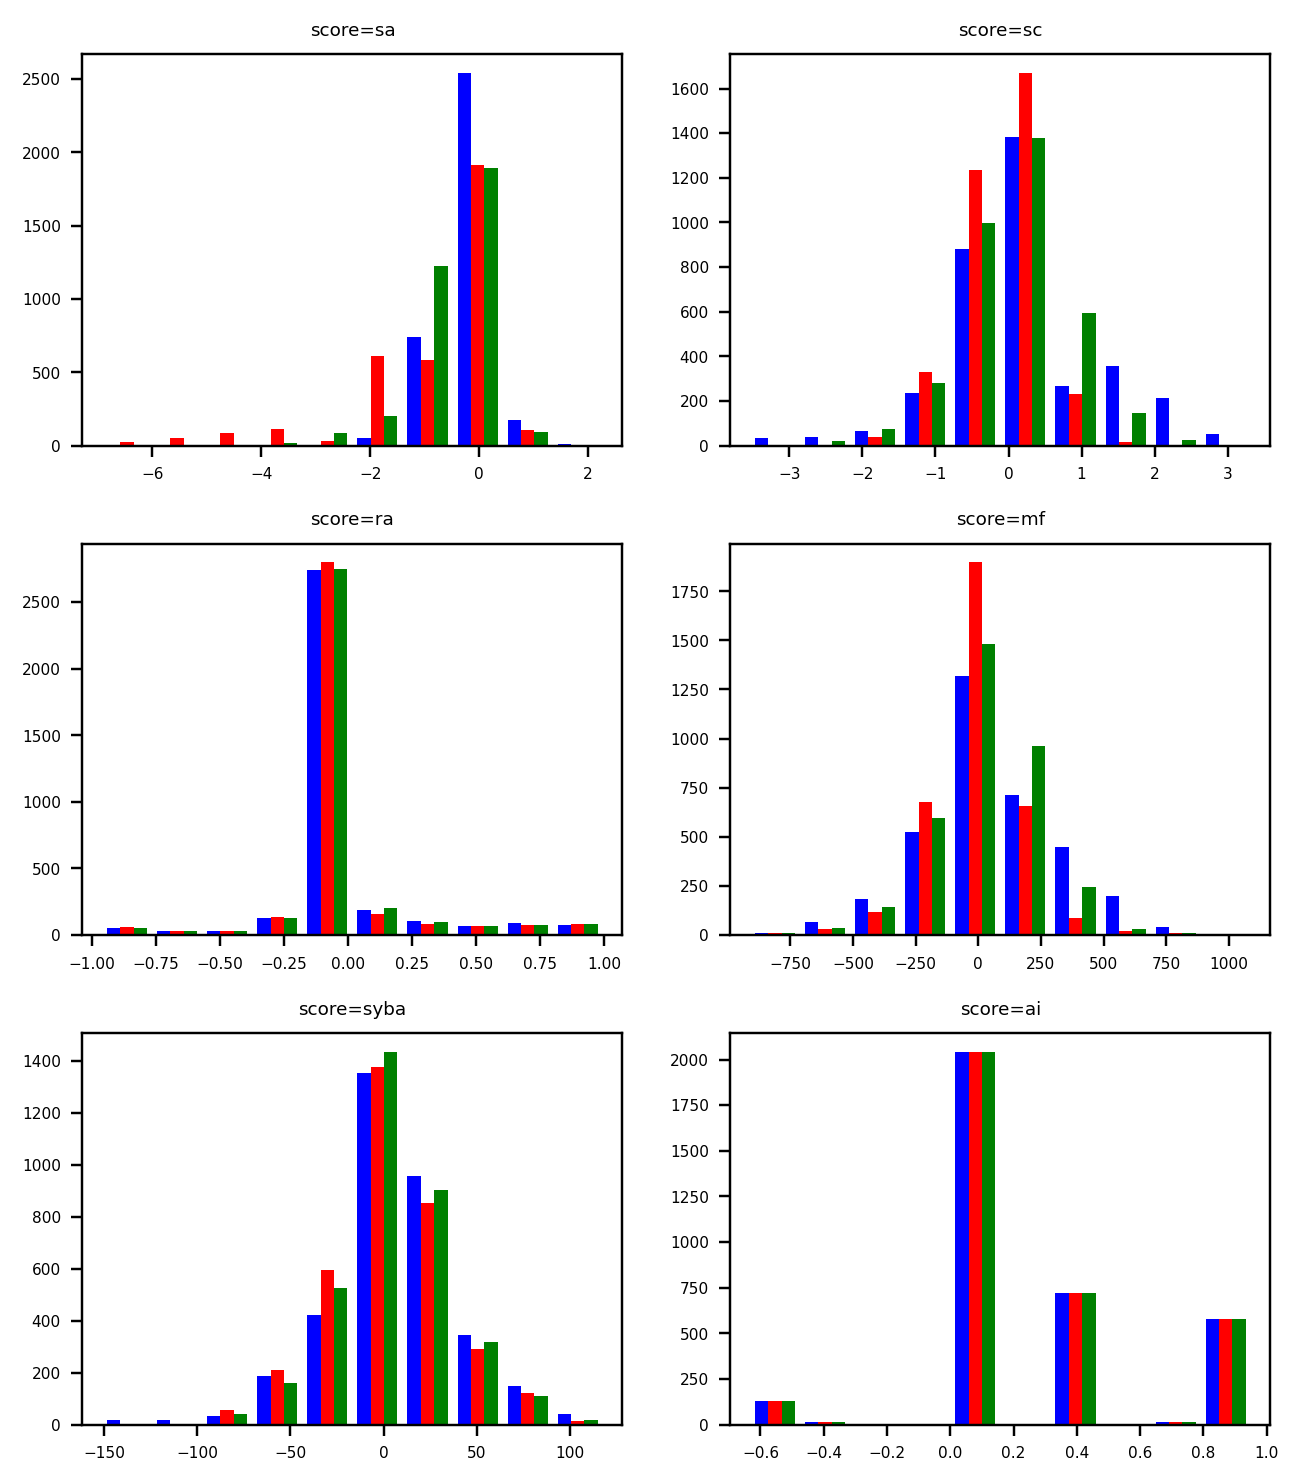

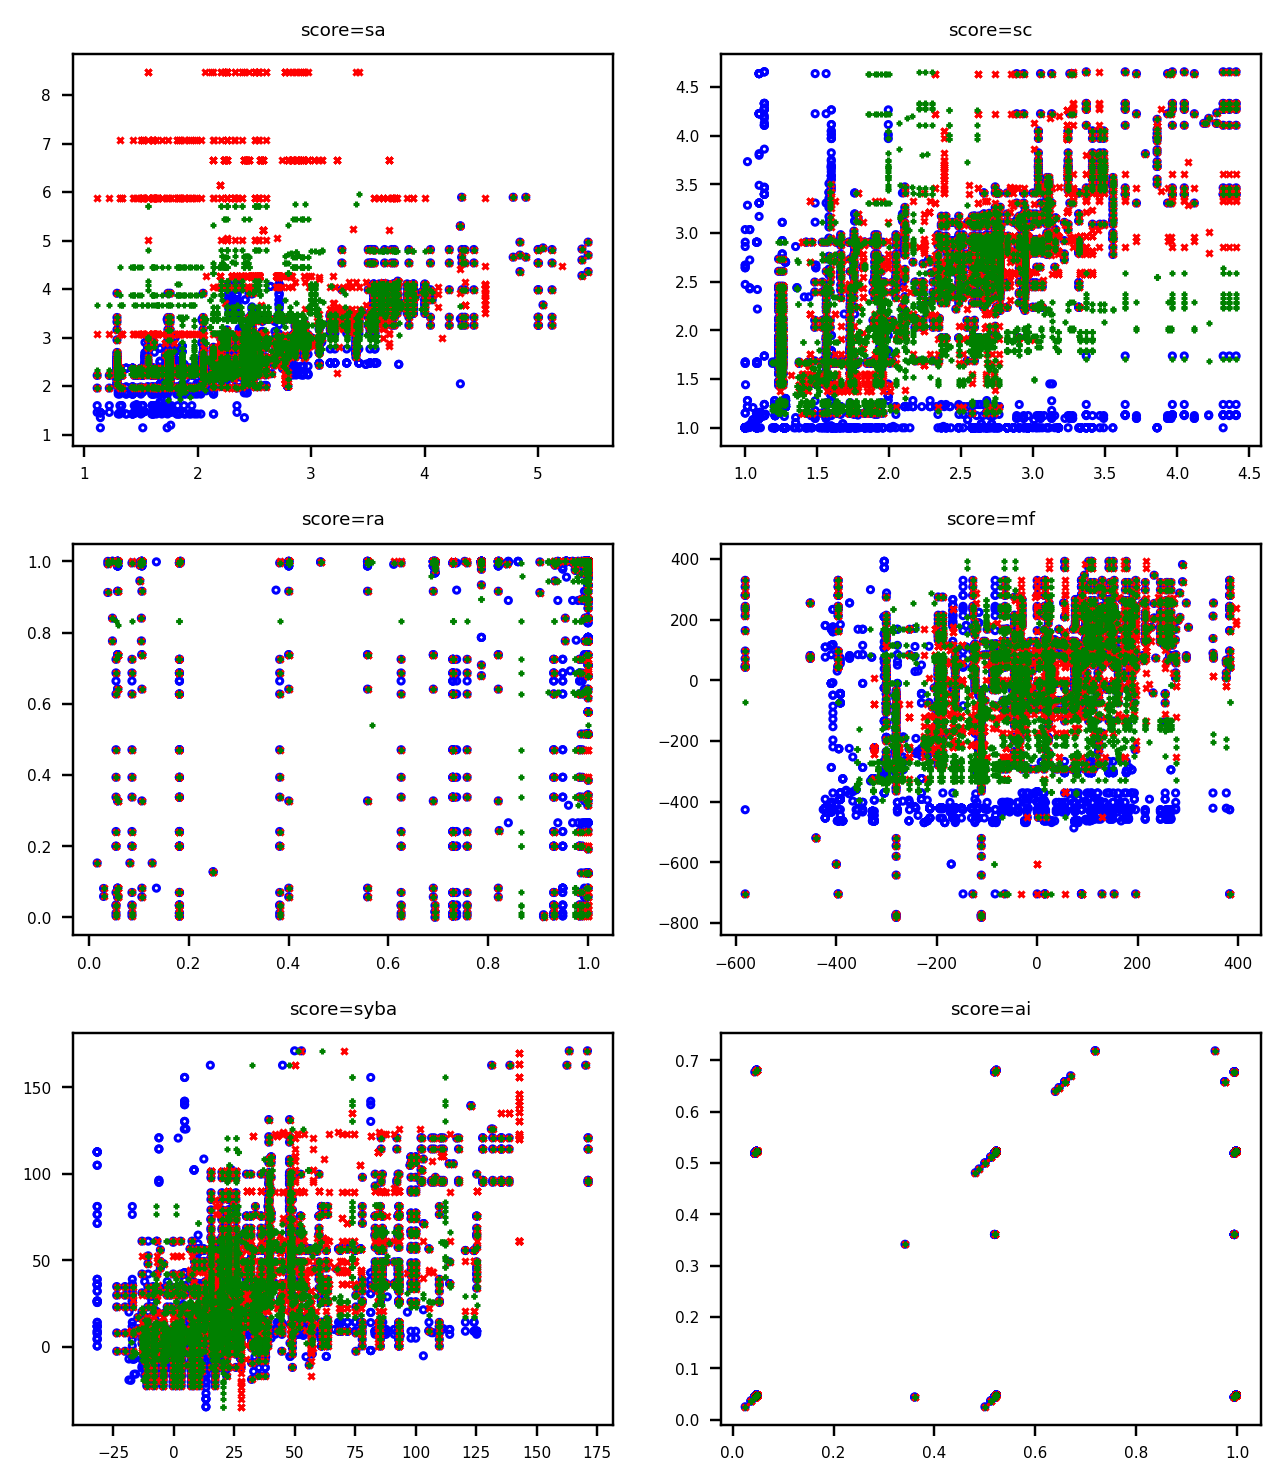

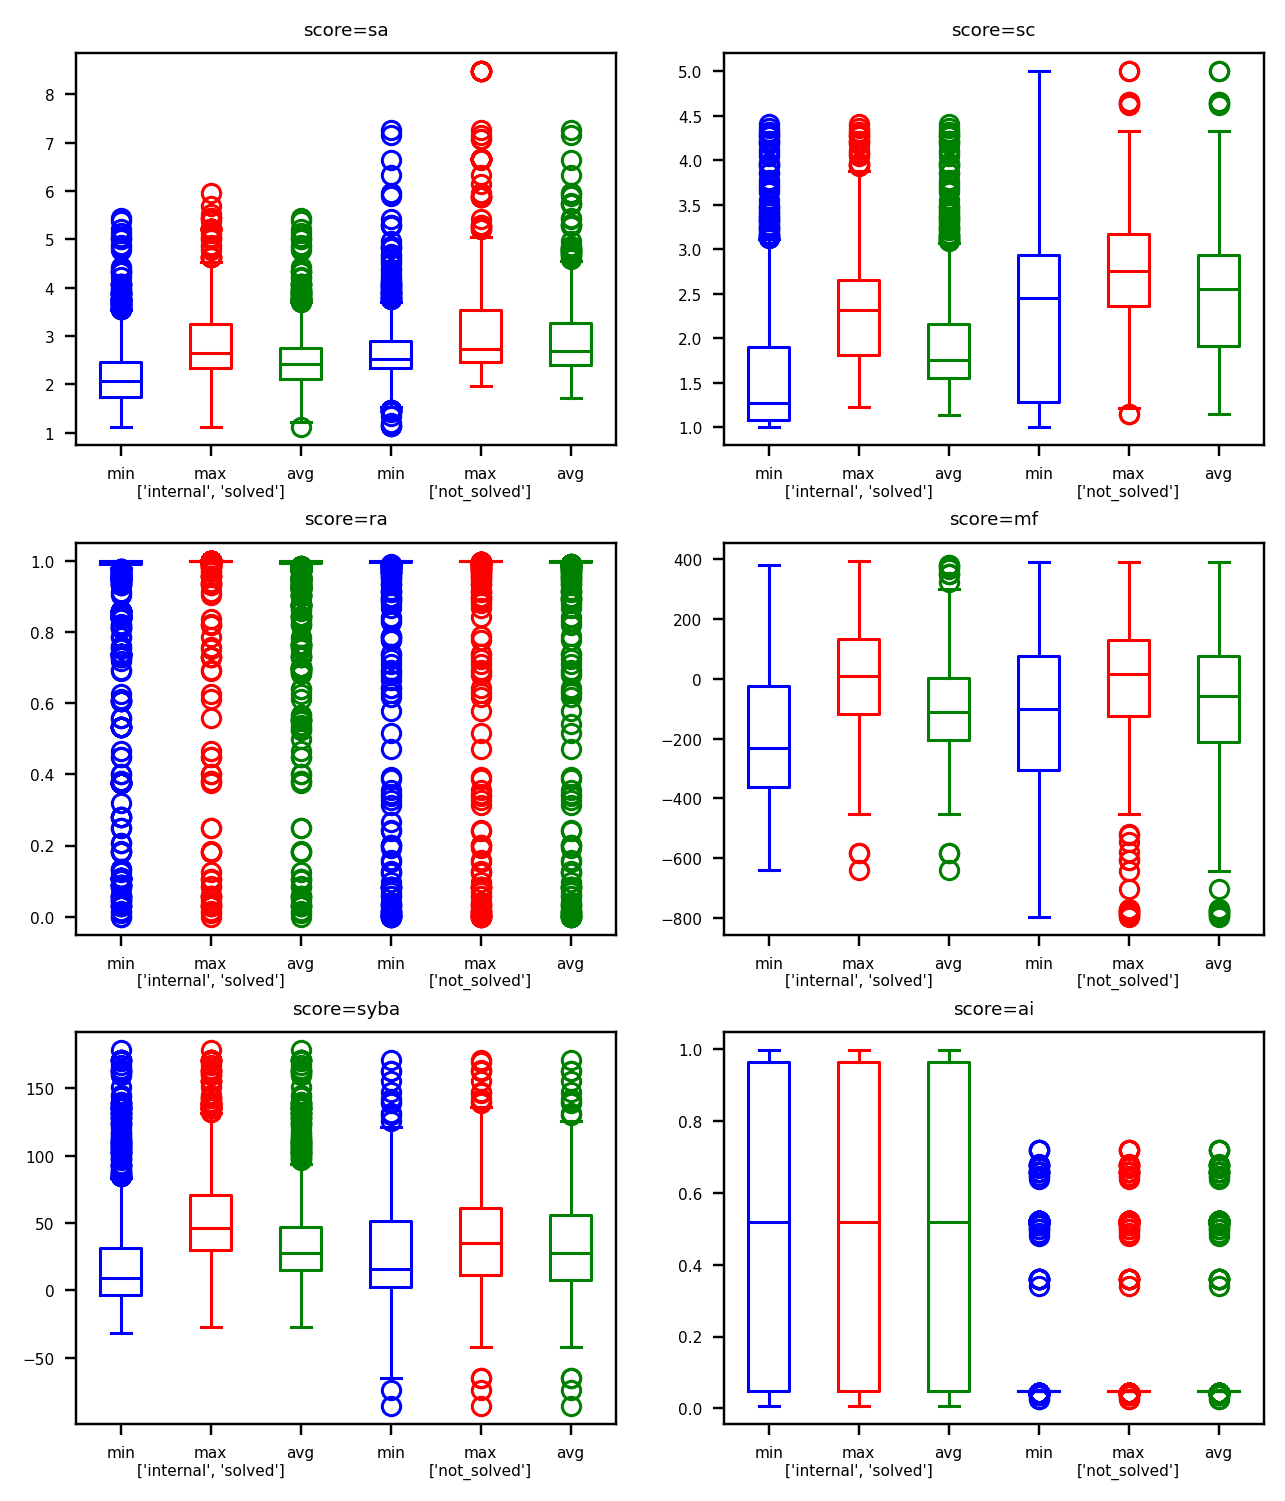

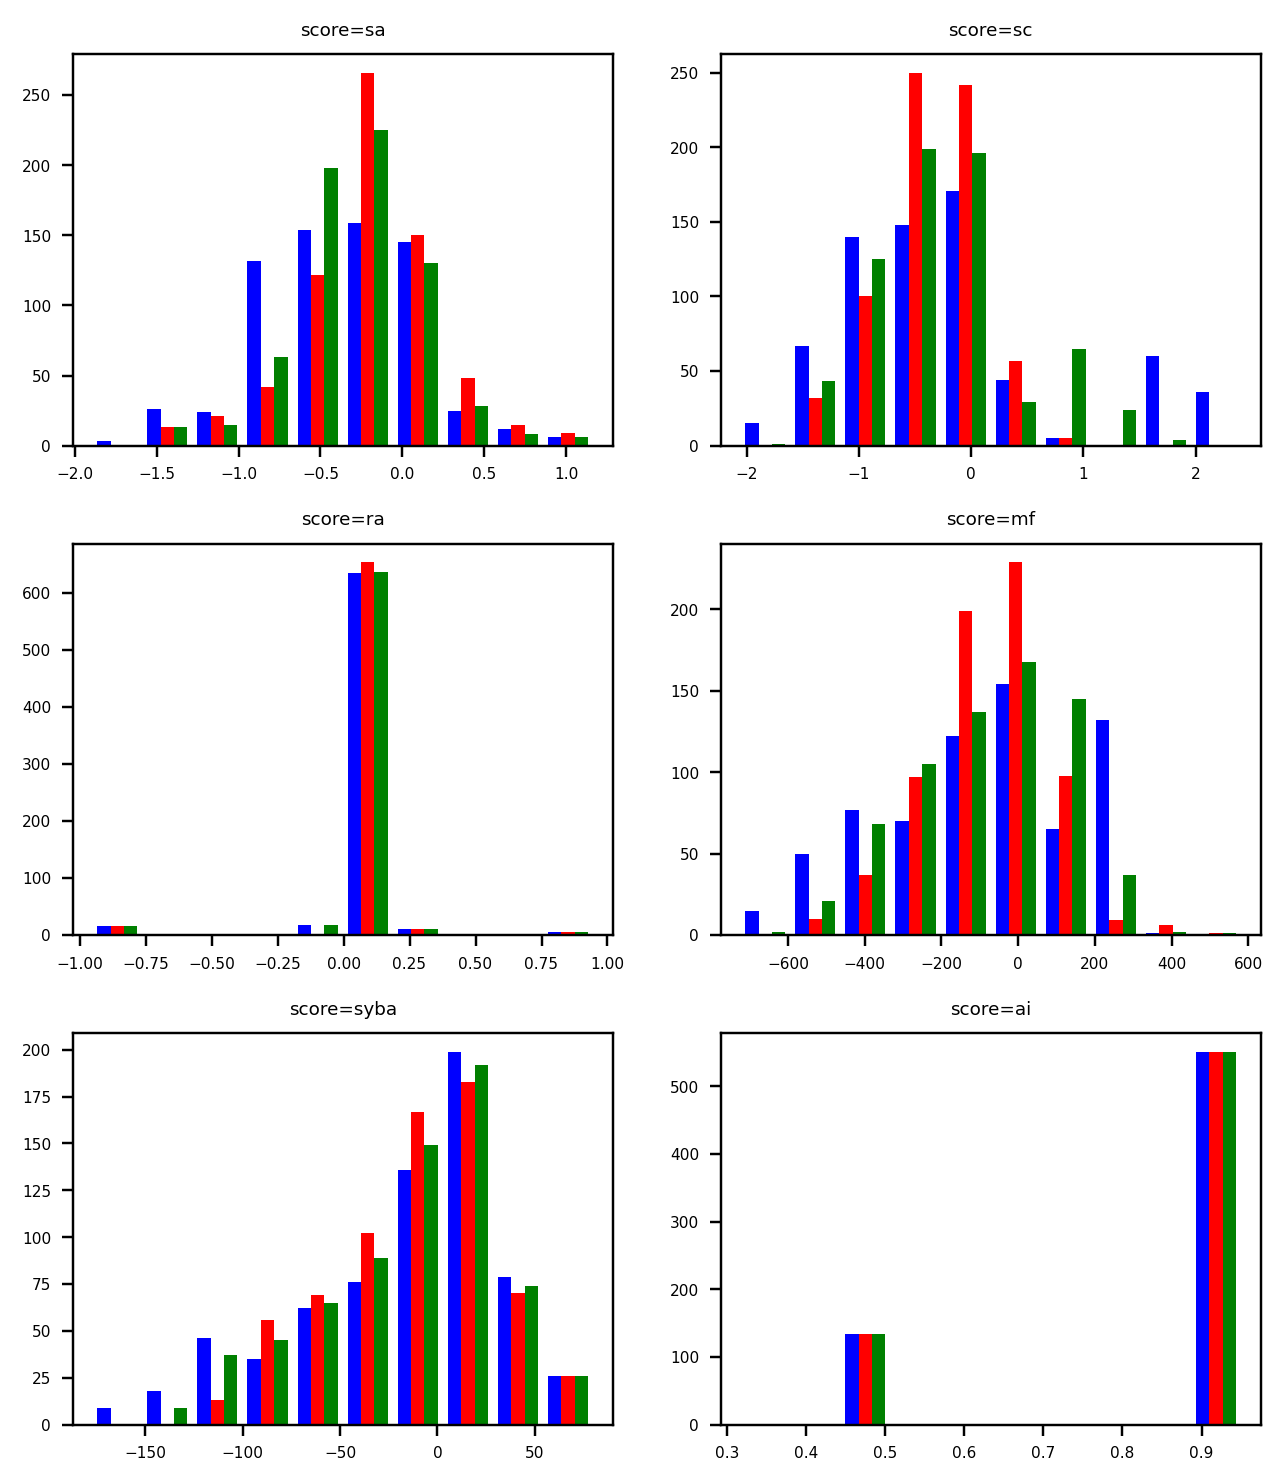

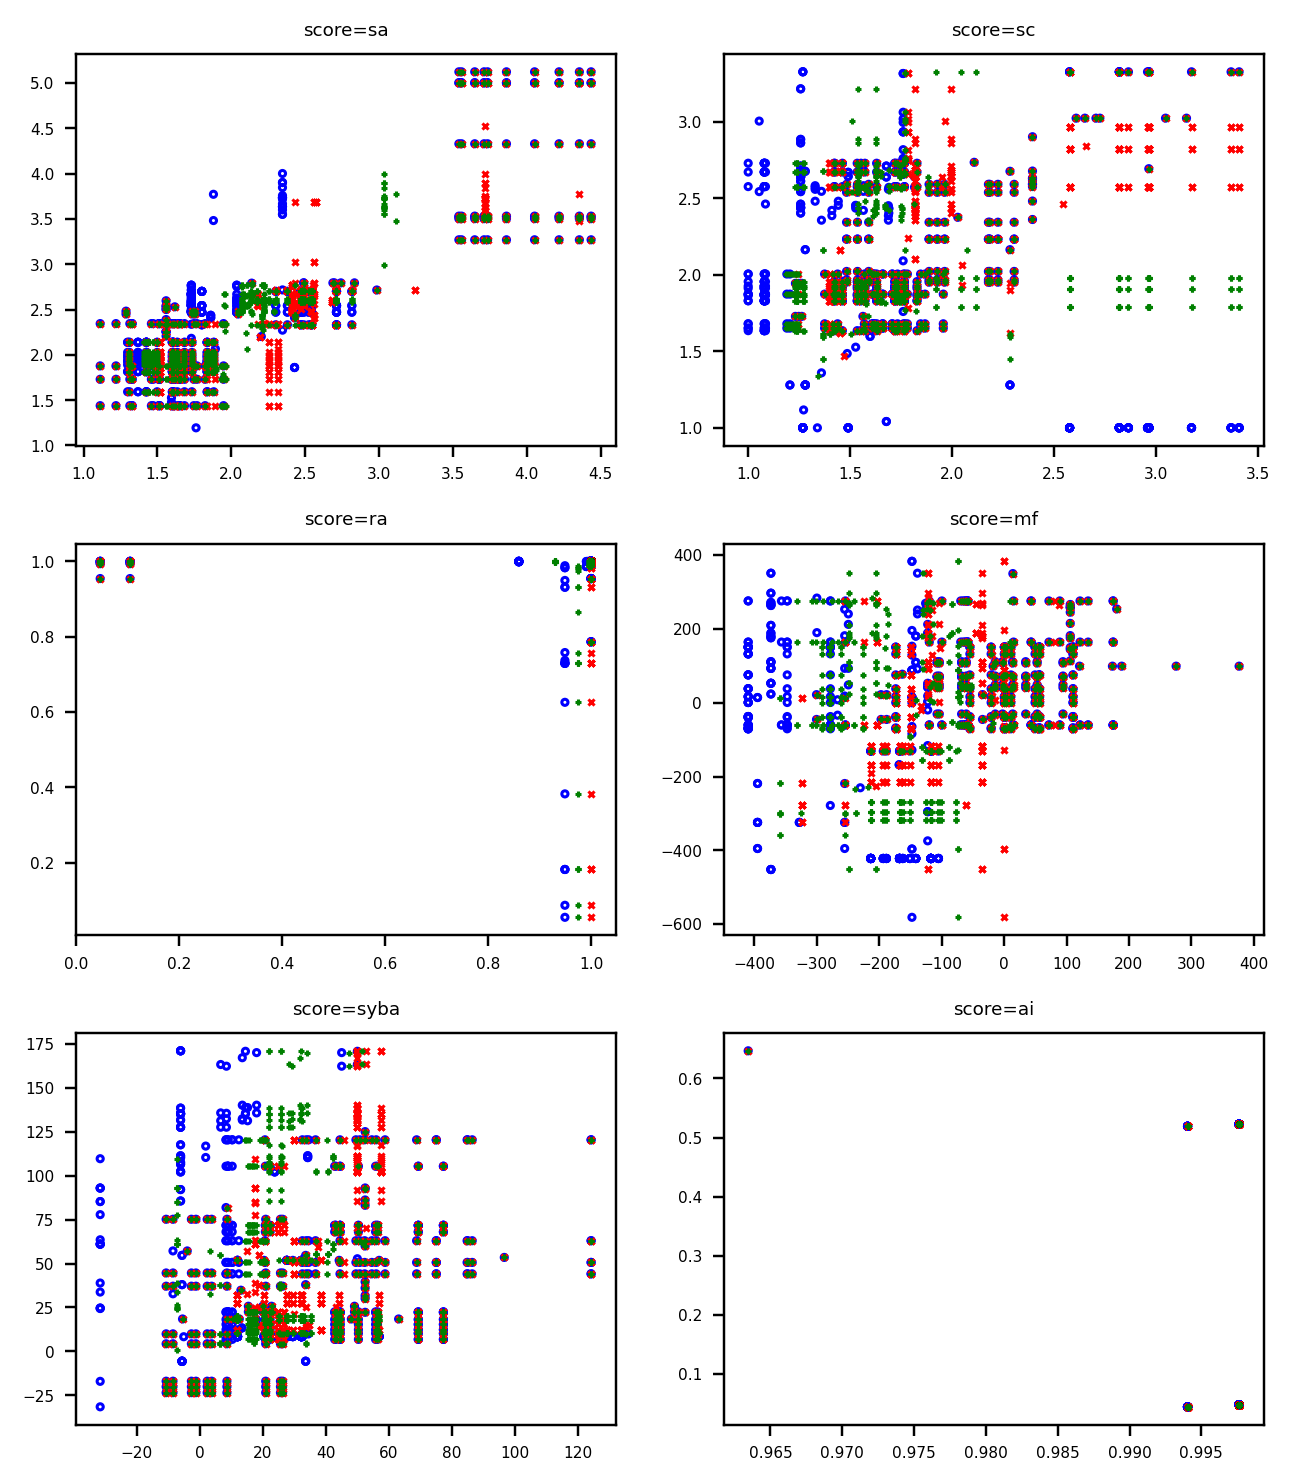

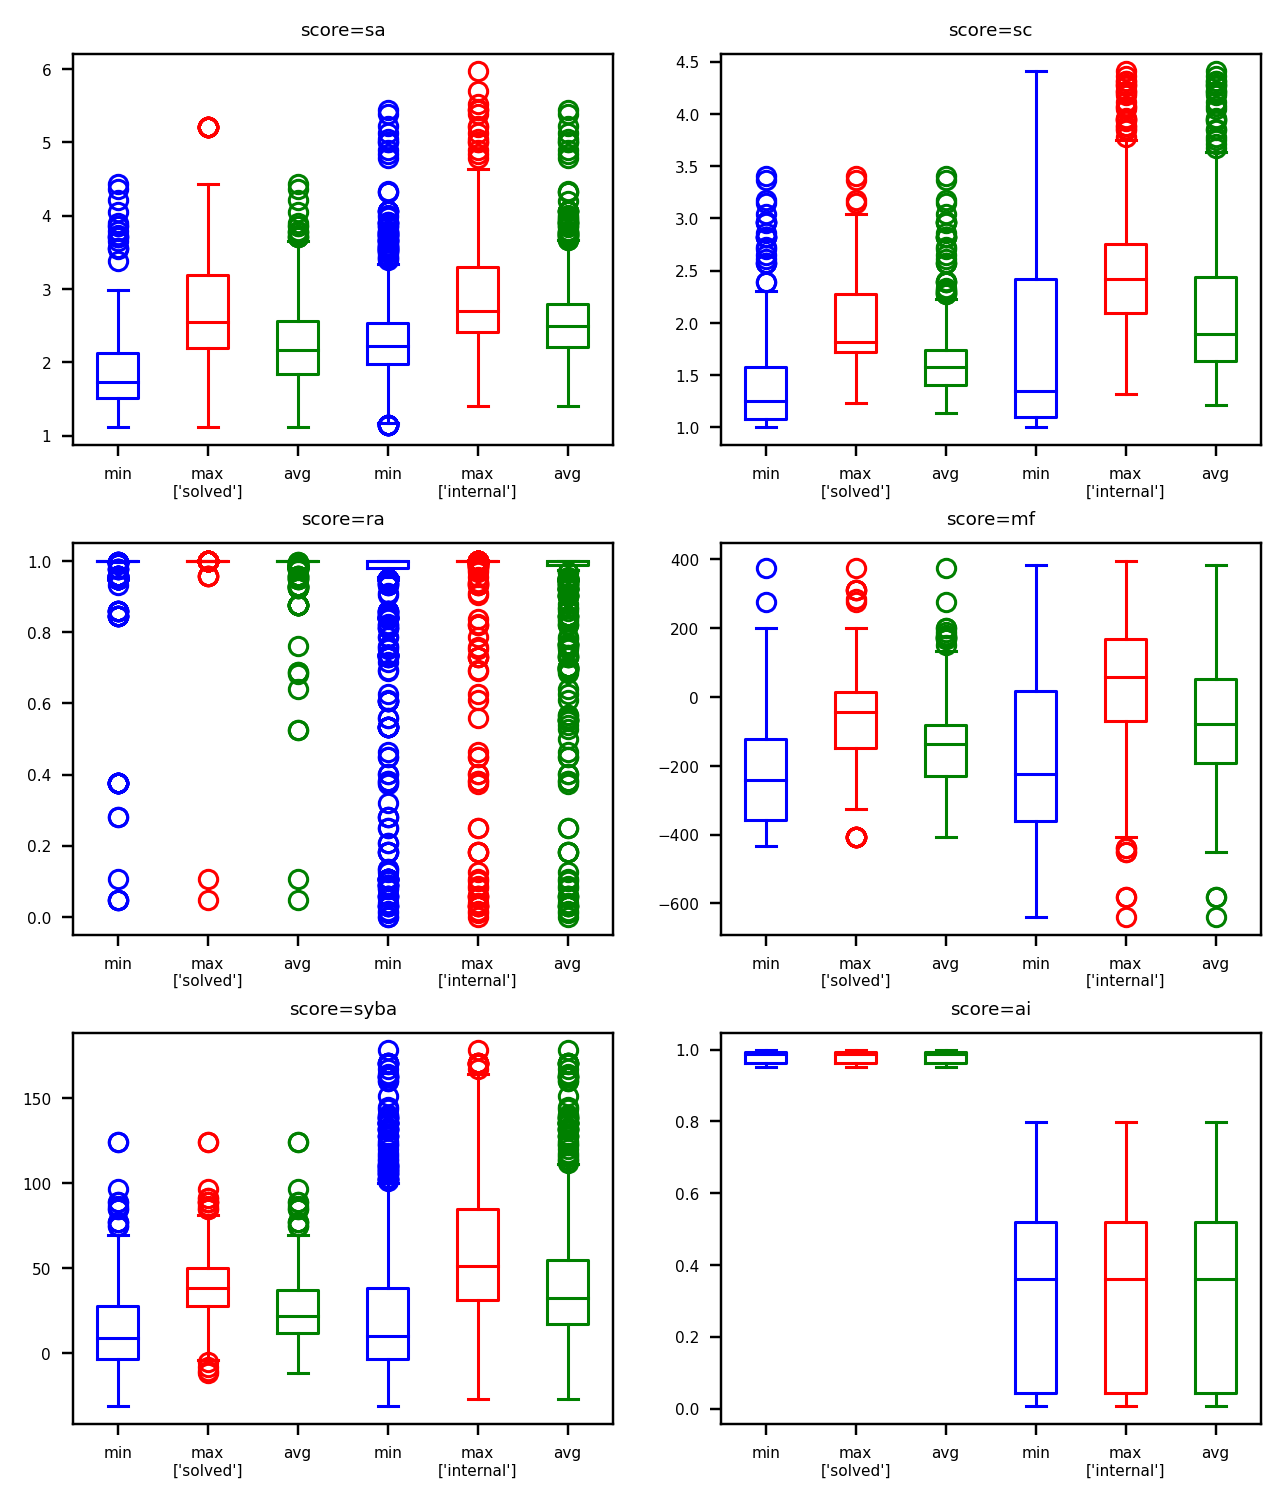

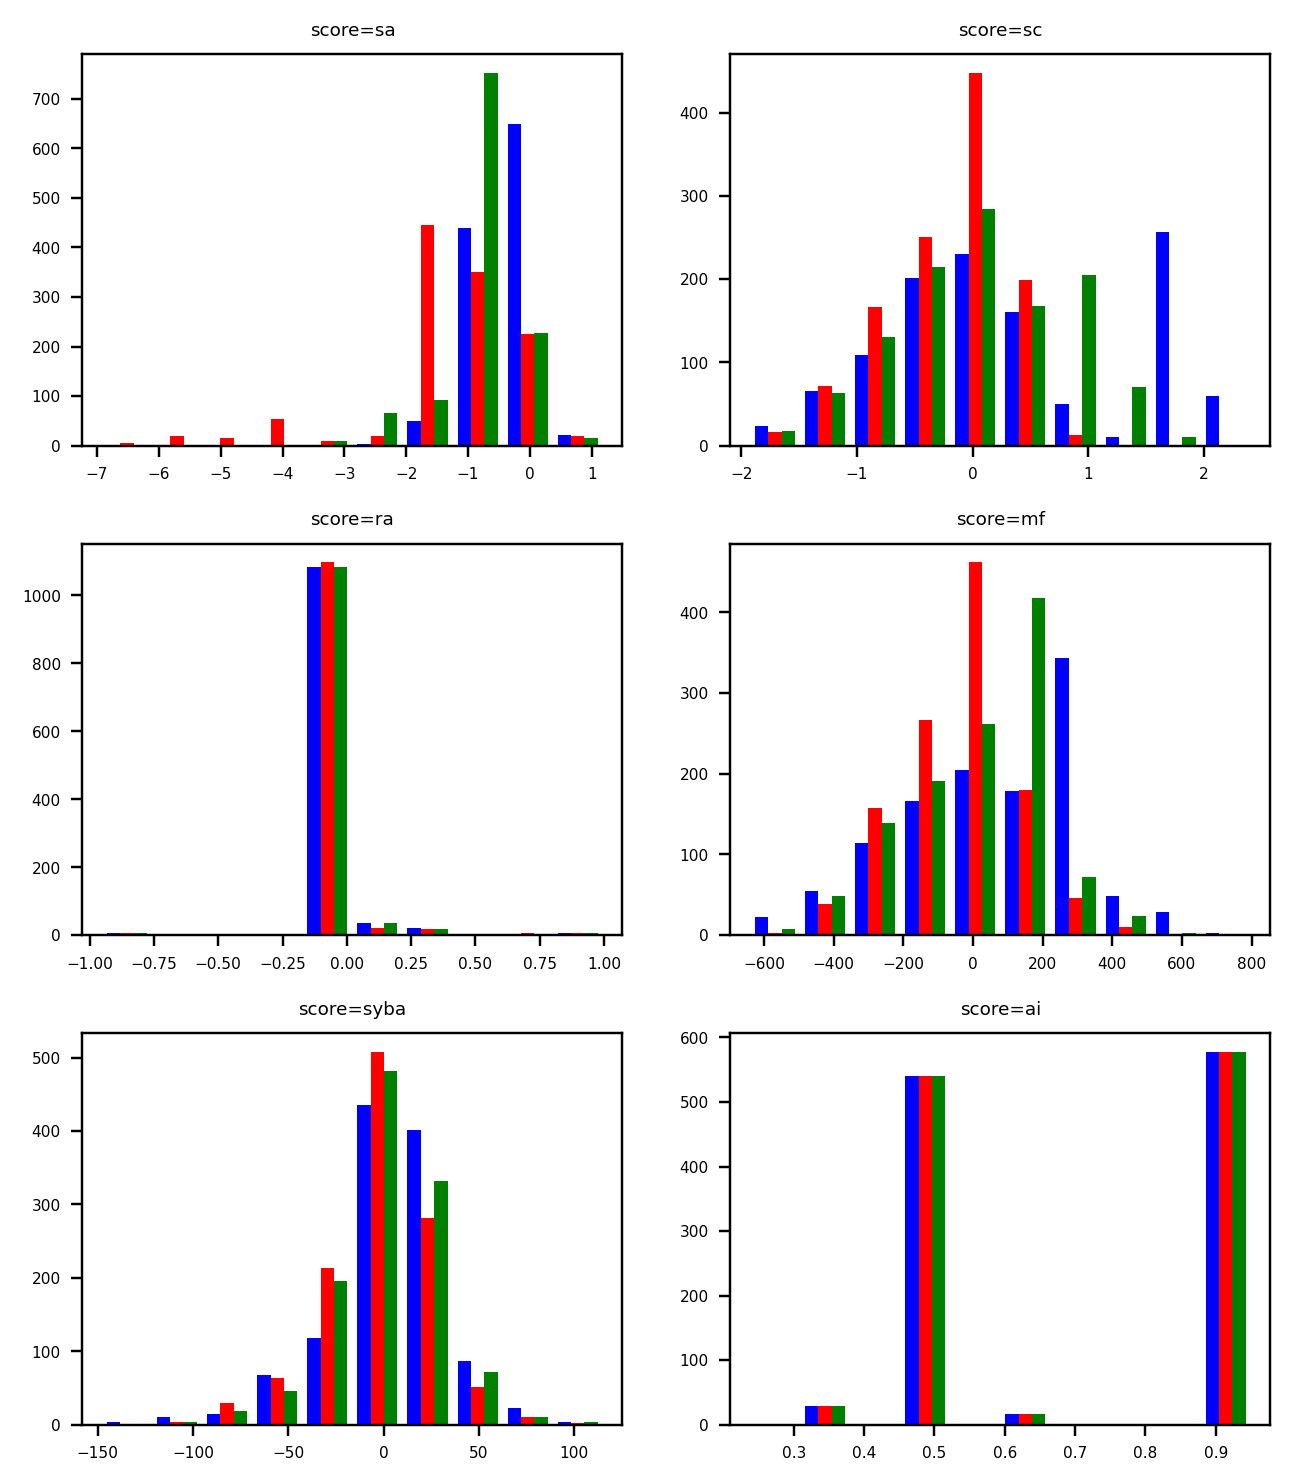

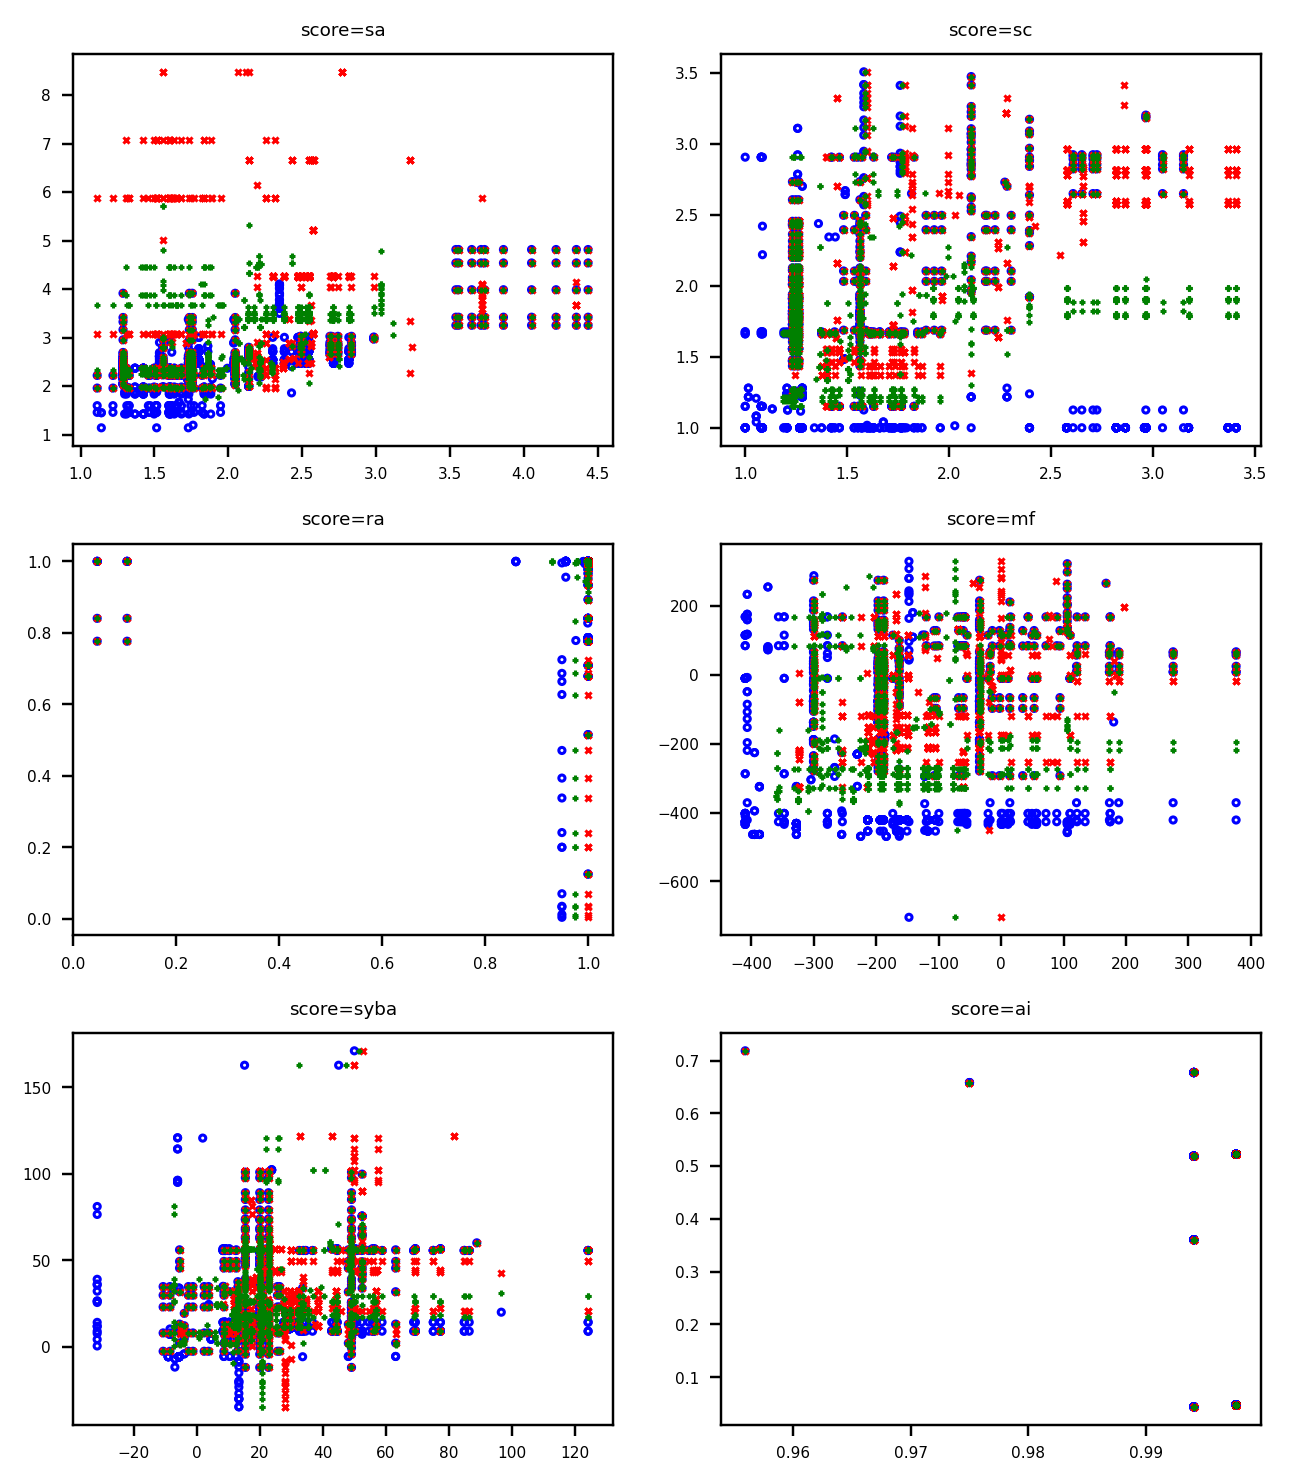

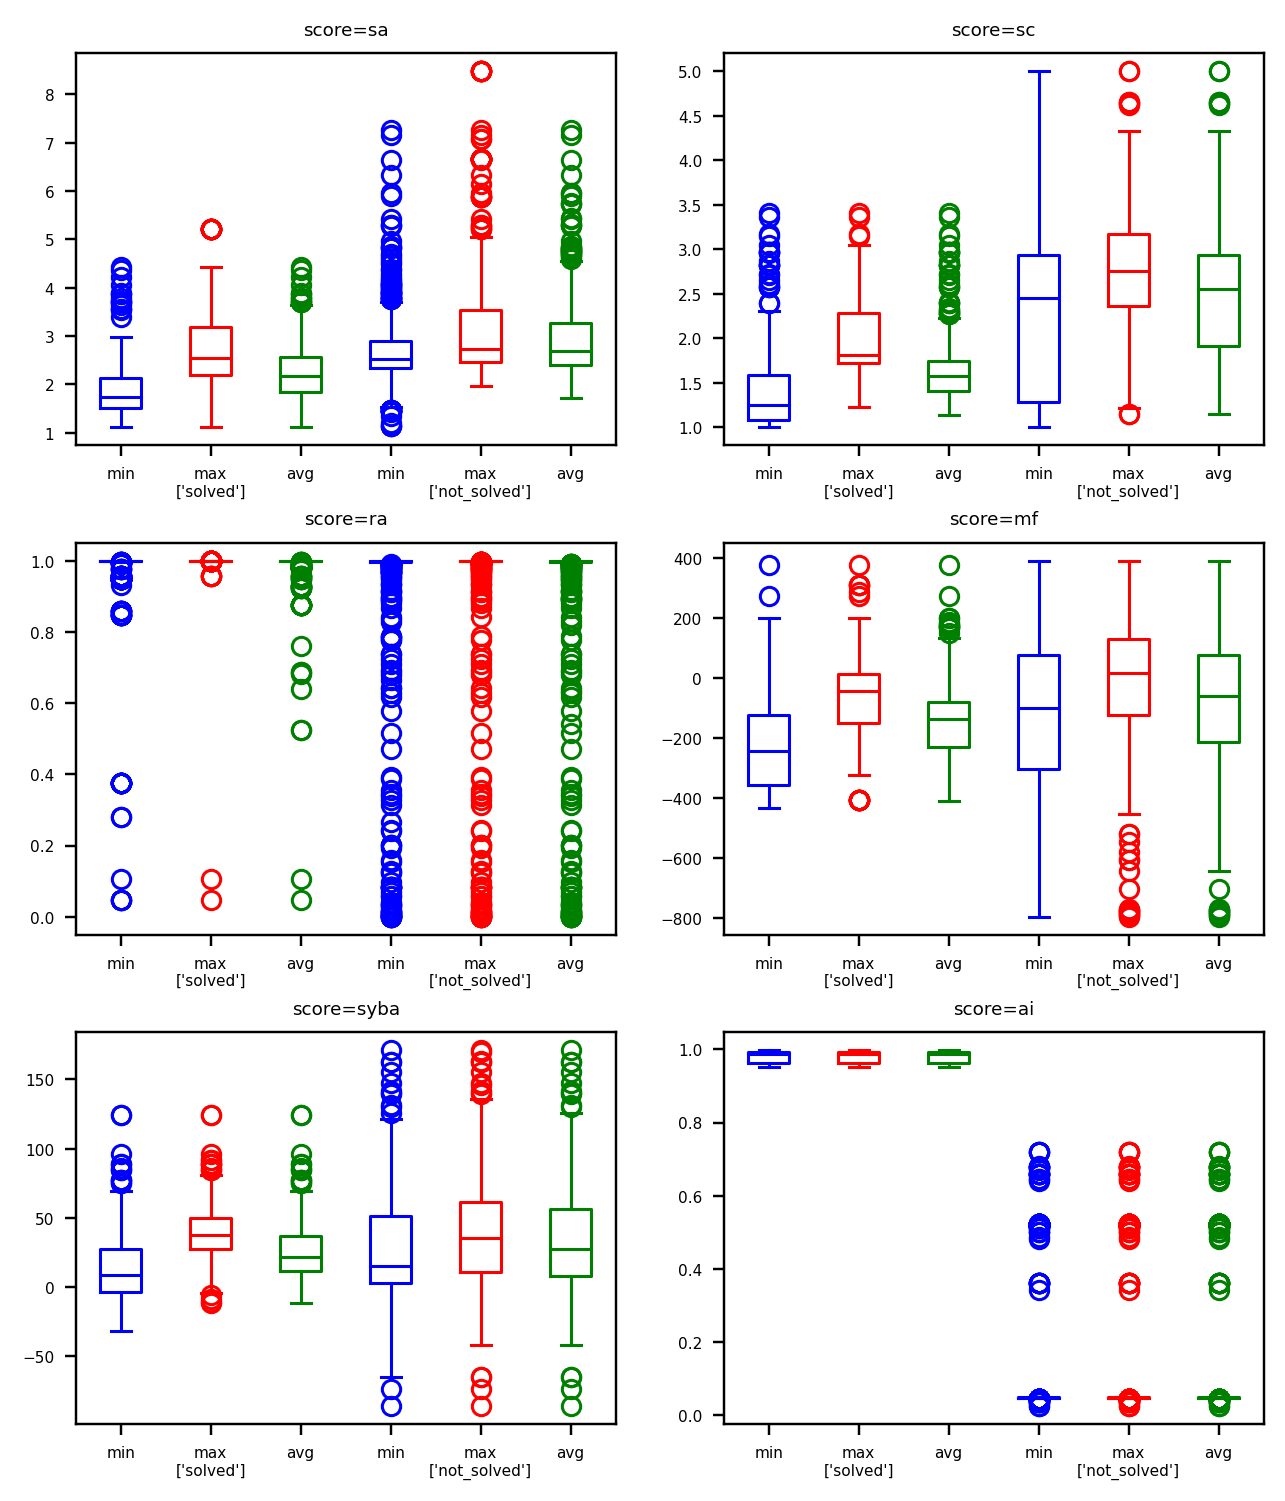

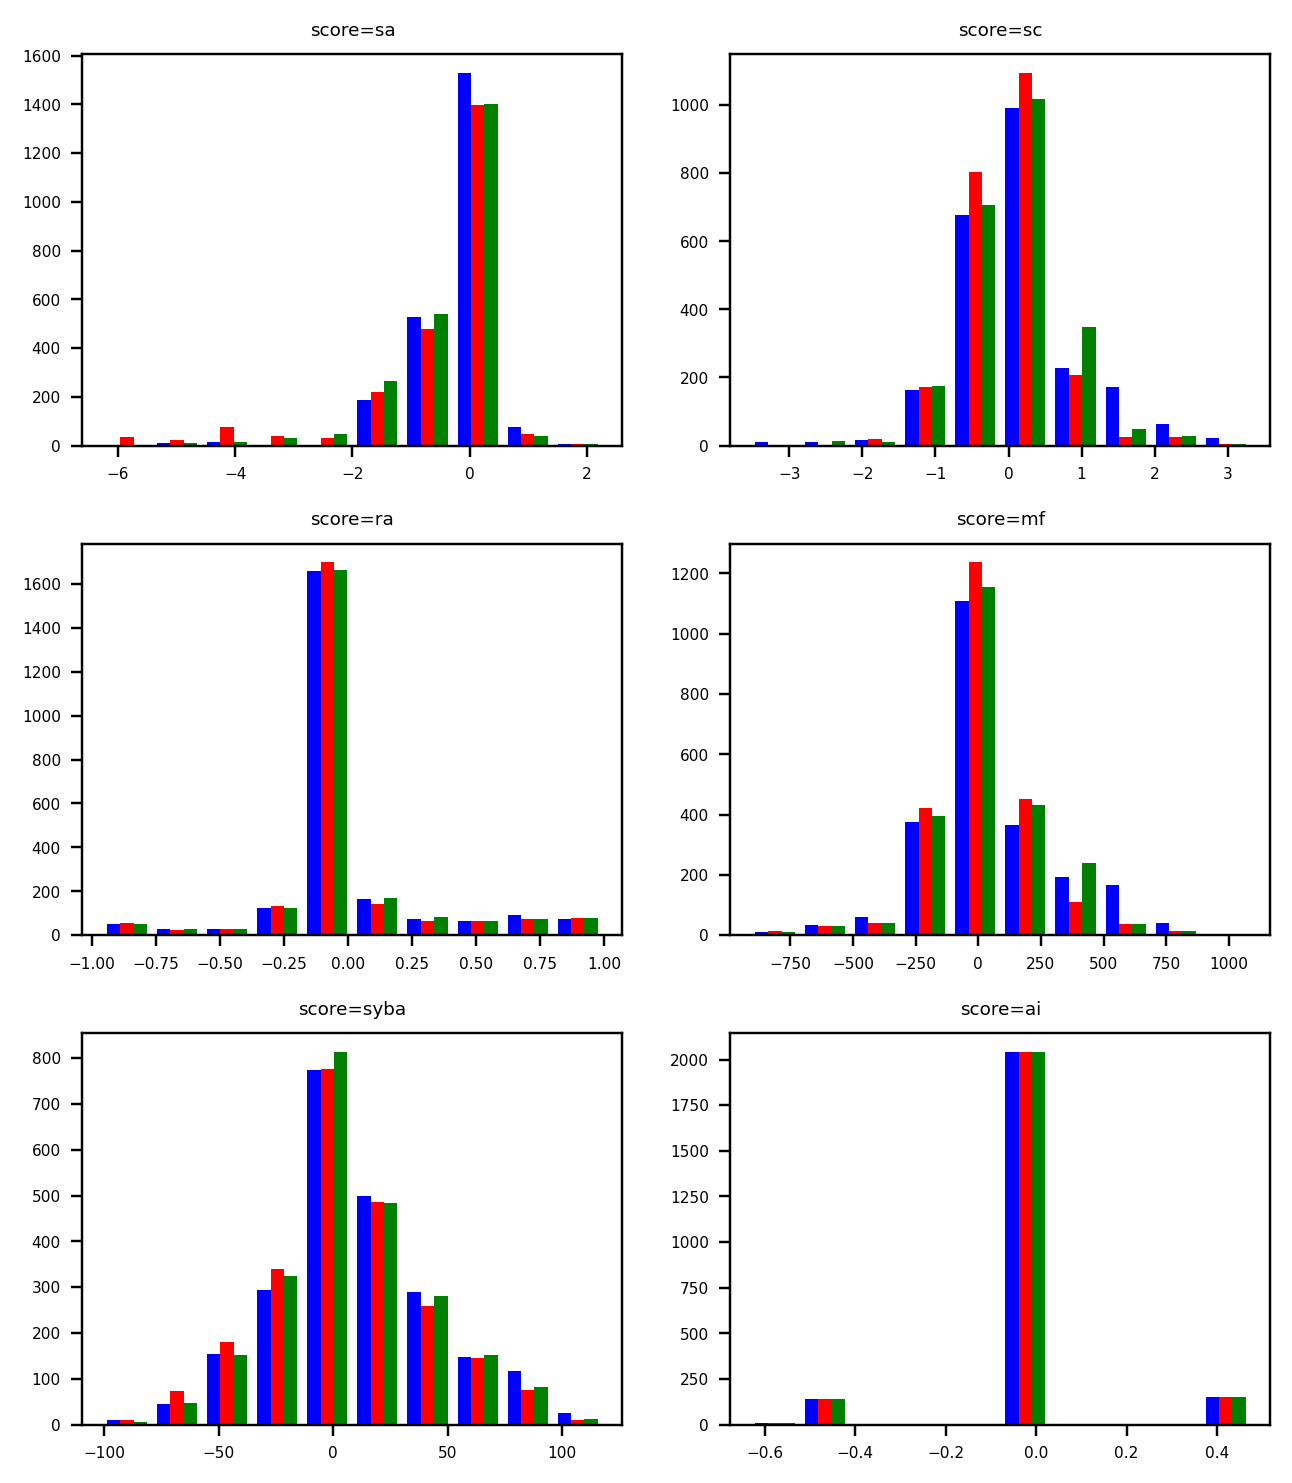

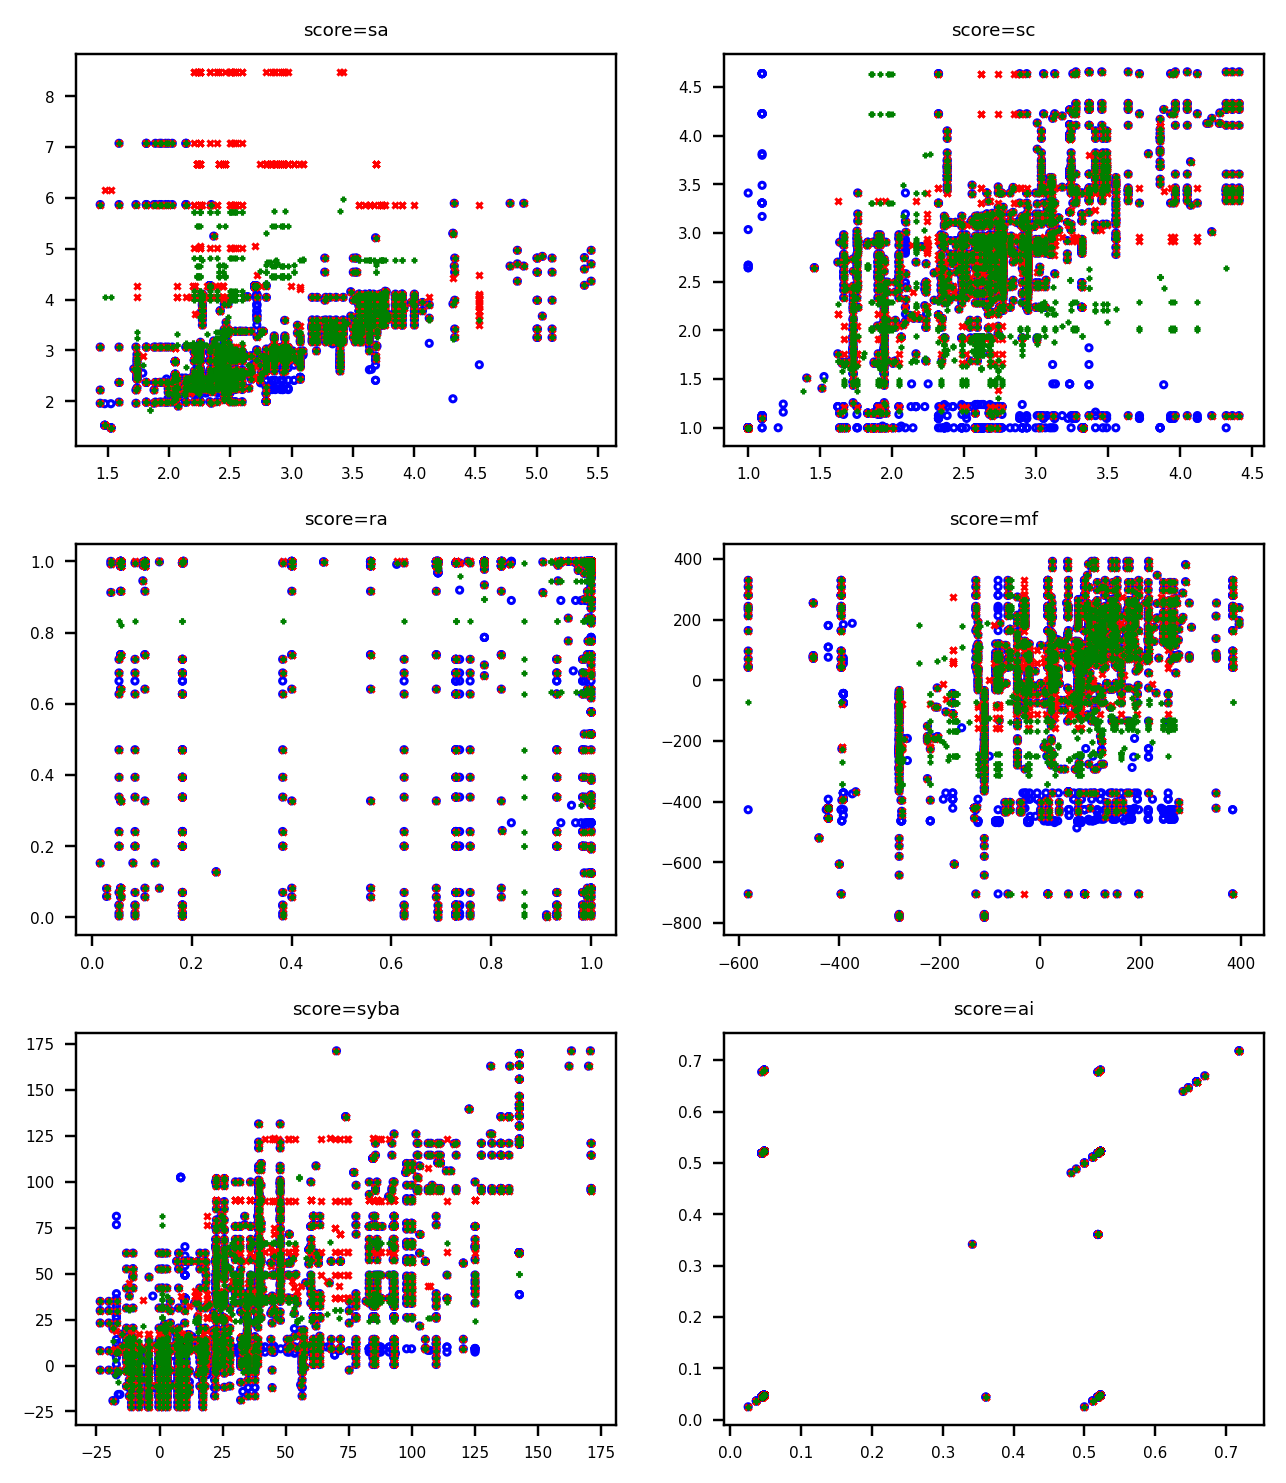

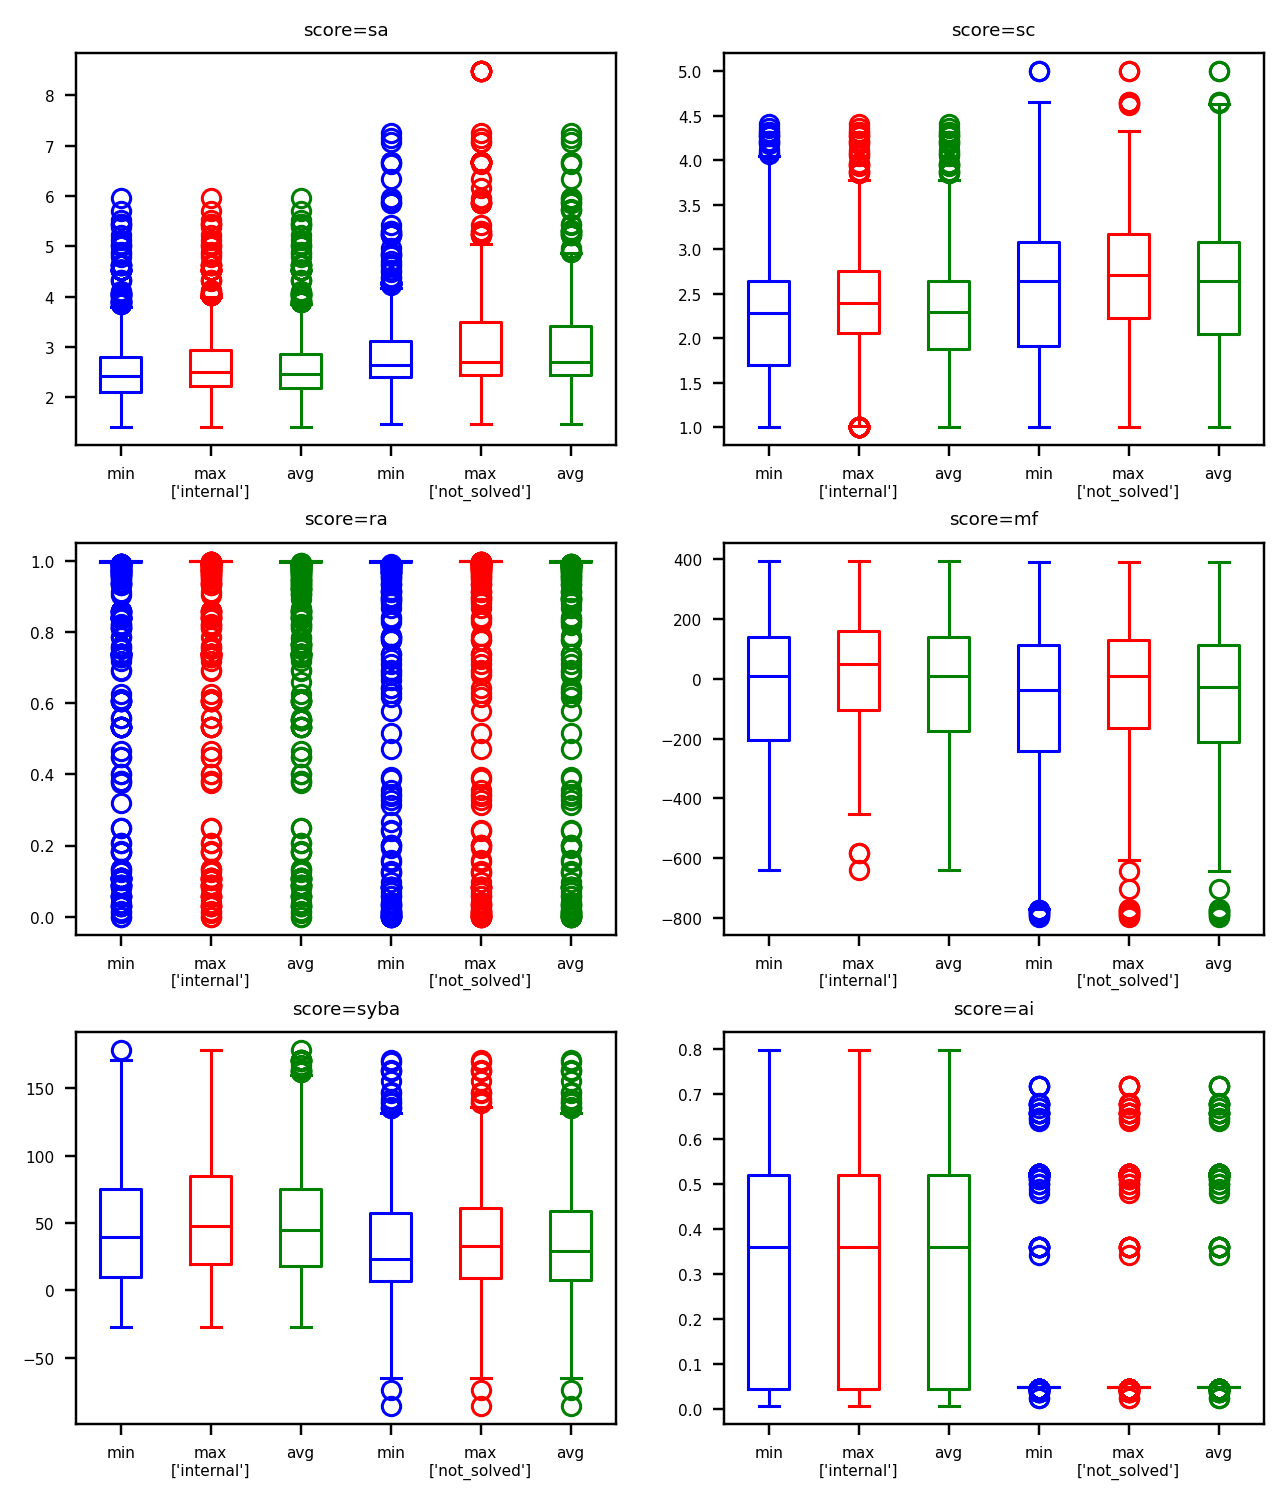

In [1]:
%load_ext autoreload
%autoreload 2
from typing import Callable
from main.tree import Tree, TreeTypes
from main.score import Score
from main.stats import histogram_pairs, scatter_pairs, boxplot_scores

def f(x: list[TreeTypes], y: list[TreeTypes], fn: Callable[[Tree], list[Score]]): return x, y, fn

def expandable_mols(tree: Tree): return [smiles.score for smiles in tree.expandable]
def all_mols(tree: Tree): return [smiles.score for smiles in (tree.expandable + tree.in_stock)]

detailed=False
for xtype, ytype, tree_to_scores in [
    f(["internal"], ["not_solved"], all_mols),
    f(["internal", "solved"], ["not_solved"], all_mols),
    f(["solved"], ["internal"], all_mols),
    f(["solved"], ["not_solved"], all_mols),
    f(["internal"], ["not_solved"], expandable_mols),
]:
    histogram_pairs(xtype, ytype, tree_to_scores, detailed)
    scatter_pairs(xtype, ytype, tree_to_scores, detailed)
    boxplot_scores(xtype, ytype, tree_to_scores, detailed)